# –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ 7. –ü–û–õ–ù–û–°–í–Ø–ó–ù–´–ï –ù–ï–ô–†–û–ù–ù–´–ï –°–ï–¢–ò (FCNN). –†–ï–®–ï–ù–ò–ï –ó–ê–î–ê–ß –†–ï–ì–†–ï–°–°–ò–ò –ò –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò

In [1]:
!pip install tabulate

In [2]:
pip install imbalanced-learn

In [3]:
!pip install seaborn

In [5]:
pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 386.6/386.6 kB 8.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 242.5/242.5 kB 16.7 MB/s eta 0:00:00


In [8]:
pip install seaborn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import (r2_score, mean_squared_error,
                           mean_absolute_error, accuracy_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, precision_score, recall_score)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import clone
import optuna
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

## 2. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö.
2.1. –í —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã–º –≤–∞—Ä–∏–∞–Ω—Ç–æ–º –∑–∞–≥—Ä—É–∑–∏—Ç–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞—Ç–∞—Å–µ—Ç—ã –≤ —Ñ–æ—Ä–º–∞—Ç–µ CSV –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

2.2. –ö –¥–∞–Ω–Ω—ã–º –ø—Ä–∏–º–µ–Ω–∏—Ç–µ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é k-fold.
    
2.3. –í—ã–ø–æ–ª–Ω–∏—Ç–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –≤ –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö.

In [11]:
from google.colab import files

uploaded = files.upload()

Saving data_newHouse.csv to data_newHouse.csv
Saving data_newKredit.csv to data_newKredit.csv


In [12]:
df_reg = pd.read_csv('data_newHouse.csv')
df_clf = pd.read_csv('data_newKredit.csv')

In [13]:
X_reg = df_reg.drop(columns=['price'])
y_reg = df_reg['price']
X_clf = df_clf.drop(columns=['fraud'])
y_clf = df_clf['fraud']

In [14]:
print(f"\n–†–µ–≥—Ä–µ—Å—Å–∏—è: {X_reg.shape[0]} samples, {X_reg.shape[1]} features")
print(f"–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è: {X_clf.shape[0]} samples, {X_clf.shape[1]} features")


–†–µ–≥—Ä–µ—Å—Å–∏—è: 21599 samples, 23 features
–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è: 1000000 samples, 7 features


In [15]:
class_dist = pd.Series(y_clf).value_counts(normalize=True) * 100
print(f"\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:")
print(f"–ö–ª–∞—Å—Å 0 (–Ω–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ): {class_dist[0]:.2f}%")
print(f"–ö–ª–∞—Å—Å 1 (–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ): {class_dist[1]:.2f}%")


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
–ö–ª–∞—Å—Å 0 (–Ω–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ): 91.26%
–ö–ª–∞—Å—Å 1 (–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ): 8.74%


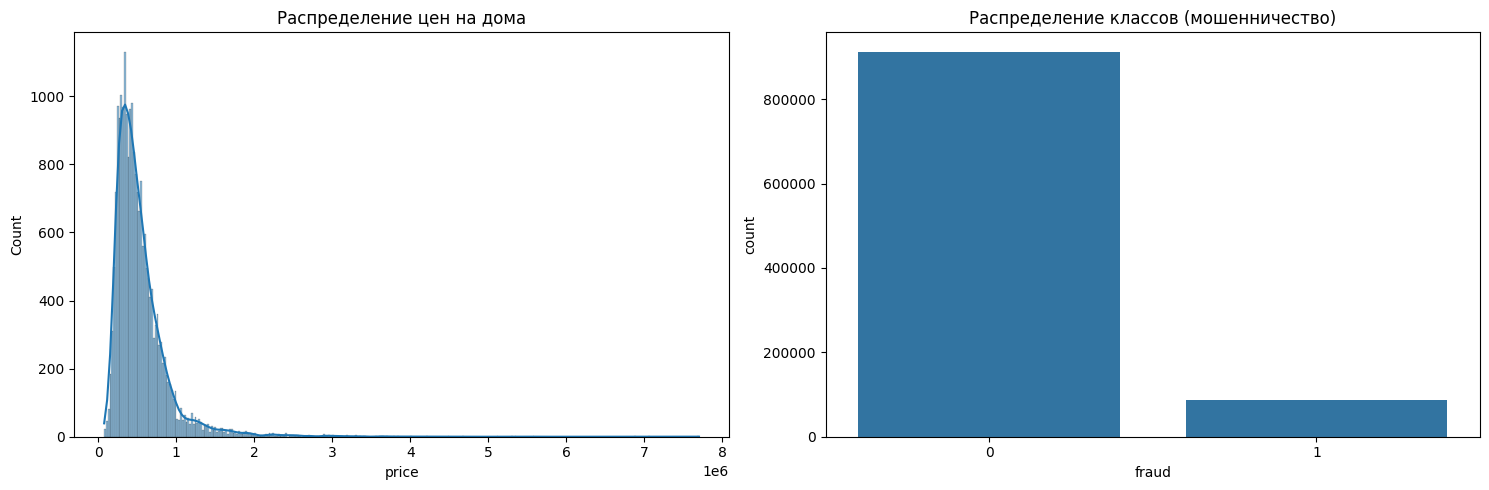

In [16]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(y_reg, kde=True, ax=ax[0])
ax[0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –¥–æ–º–∞')
sns.countplot(x=y_clf, ax=ax[1])
ax[1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ (–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ)')
plt.tight_layout()
plt.show()

In [17]:
# 2.2. –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è k-fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [18]:
# 2.3. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print("\n2.3. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞")

# –î–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
selector_reg = SelectKBest(f_regression, k=8)
X_reg_selected = selector_reg.fit_transform(X_reg, y_reg)
print(f"–†–µ–≥—Ä–µ—Å—Å–∏—è: –≤—ã–±—Ä–∞–Ω–æ {X_reg_selected.shape[1]} –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ {X_reg.shape[1]}")

# –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
selector_clf = VarianceThreshold(threshold=0.2)
X_clf_selected = selector_clf.fit_transform(X_clf)
print(f"–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è: –æ—Å—Ç–∞–ª–æ—Å—å {X_clf_selected.shape[1]} –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ {X_clf.shape[1]}")


2.3. –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞
–†–µ–≥—Ä–µ—Å—Å–∏—è: –≤—ã–±—Ä–∞–Ω–æ 8 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ 23
–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è: –æ—Å—Ç–∞–ª–æ—Å—å 5 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ 7


In [19]:
print("\n–î–∞—Ç–∞—Å–µ—Ç —Ä–µ–≥—Ä–µ—Å—Å–∏–∏")
X_reg_selected_pd = pd.DataFrame(X_reg_selected, columns=selector_reg.get_feature_names_out())
X_reg_selected_pd.head()


–î–∞—Ç–∞—Å–µ—Ç —Ä–µ–≥—Ä–µ—Å—Å–∏–∏


bathrooms  sqft_living  view  grade  sqft_above  sqft_basement  \
0       1.00       1180.0   0.0    7.0      1180.0            0.0   
1       2.25       2570.0   0.0    7.0      2170.0          400.0   
2       1.00        770.0   0.0    6.0       770.0            0.0   
3       3.00       1960.0   0.0    7.0      1050.0          910.0   
4       2.00       1680.0   0.0    8.0      1680.0            0.0   

   sqft_living15  district_code  
0         1340.0           15.0  
1         1690.0           15.0  
2         2720.0           11.0  
3         1360.0           15.0  
4         1800.0           21.0

In [20]:
print("\n–î–∞—Ç–∞—Å–µ—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏")
X_clf_selected_pd = pd.DataFrame(X_clf_selected, columns=selector_clf.get_feature_names_out())
X_clf_selected_pd.head()


–î–∞—Ç–∞—Å–µ—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏


distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  used_chip  online_order  
0                        1.945940        1.0           0.0  
1                        1.294219        0.0           0.0  
2                        0.427715        0.0           1.0  
3                        0.362663        1.0           1.0  
4                        2.222767        1.0           1.0

In [21]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg_selected, y_reg, test_size=0.2, random_state=42)

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf_selected, y_clf, test_size=0.2, random_state=42)

In [22]:
# –ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ –∫–ª–∞—Å—Å–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
print("\n–ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ –∫–ª–∞—Å—Å–æ–≤:")
print(f"–î–æ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏: {Counter(y_clf_train)}")

# –ü—Ä–∏–º–µ–Ω—è–µ–º SMOTE —Ç–æ–ª—å–∫–æ –∫ –æ–±—É—á–∞—é—â–∏–º –¥–∞–Ω–Ω—ã–º
smote = SMOTE(sampling_strategy=1, random_state=42)
X_clf_bal, y_clf_bal = smote.fit_resample(X_clf_train, y_clf_train)


–ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ –∫–ª–∞—Å—Å–æ–≤:
–î–æ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏: Counter({0: 730040, 1: 69960})


In [23]:
# –ü–æ–¥–≤—ã–±–æ—Ä–∫–∞
X_clf_final, _, y_clf_final, _ = train_test_split(
    X_clf_bal, y_clf_bal,
    train_size=0.002,
    stratify=y_clf_bal,
    random_state=42
)

print(f"–ü–æ—Å–ª–µ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏: {Counter(y_clf_final)}")

–ü–æ—Å–ª–µ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏: Counter({1: 1460, 0: 1460})


In [24]:
X_reg_final, _, y_reg_final, _ = train_test_split(X_reg_train, y_reg_train,
                                                          train_size=0.2,
                                                          random_state=42)

In [25]:
# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
scaler_reg = StandardScaler()
X_reg_train_scaled = scaler_reg.fit_transform(X_reg_final)
X_reg_test_scaled = scaler_reg.transform(X_reg_test)

scaler_clf = StandardScaler()
X_clf_train_scaled = scaler_clf.fit_transform(X_clf_final)
X_clf_test_scaled = scaler_clf.transform(X_clf_test)

## 3. –†–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å –ø–æ–º–æ—â—å—é FCNN.

### 3.1. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ FCNN (MLP) –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Scikit-learn.
3.1.1. –ü–æ–¥–±–µ—Ä–∏—Ç–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ (–ù–°) —Ç—Ä–µ–º—è —Å–ø–æ—Å–æ–±–∞–º–∏: Optuna, RandomizedSearchCV, Hyperopt

#### –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

In [26]:
# RandomizedSearchCV

param_dist_clf = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300, 500]
}

mlp_clf = MLPClassifier(random_state=42)

random_search_clf = RandomizedSearchCV(
    estimator=mlp_clf,
    param_distributions=param_dist_clf,
    n_iter=20,
    cv=kf,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_clf.fit(X_clf_train_scaled, y_clf_final)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomizedSearchCV, –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è):")
print(random_search_clf.best_params_)

KeyboardInterrupt: 

In [27]:
# –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomizedSearchCV, –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è):
# {'solver': 'lbfgs', 'max_iter': 200, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'relu'}

In [28]:
from sklearn.model_selection import cross_val_score
# Optuna

def objective_clf(trial):
    hidden_layers = trial.suggest_categorical("hidden_layer_sizes", [(50,), (100,), (50, 50), (100, 50)])
    activation = trial.suggest_categorical("activation", ['relu', 'tanh'])
    solver = trial.suggest_categorical("solver", ['adam', 'sgd', 'lbfgs'])
    alpha = trial.suggest_float("alpha", 1e-5, 1e-1, log=True)
    learning_rate = trial.suggest_categorical("learning_rate", ['constant', 'adaptive'])

    model = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        max_iter=300,
        random_state=42
    )

    scores = cross_val_score(model, X_clf_train_scaled, y_clf_final, cv=kf, scoring='accuracy')
    return scores.mean()

study_clf = optuna.create_study(direction='maximize')
study_clf.optimize(objective_clf, n_trials=10)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (Optuna, –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è):")
print(study_clf.best_params)

[I 2025-05-29 10:28:35,234] A new study created in memory with name: no-name-df6a5f93-fcc2-4038-a7bb-b10538301ba1
[W 2025-05-29 10:28:37,721] Trial 0 failed with parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0001210221531575158, 'learning_rate': 'adaptive'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-28-71d46219149d>", line 21, in objective_clf
    scores = cross_val_score(model, X_clf_train_scaled, y_clf_final, cv=kf, scoring='accuracy')
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  Fil

KeyboardInterrupt: 

In [29]:
# –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (Optuna, –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è):
# {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.00018335526110730652, 'learning_rate': 'constant'}

In [ ]:
!pip install optuna hyperopt

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 1.0 MB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.6 MB 1.0 MB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 838.9 kB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.6 MB 968.5 kB/s eta 0:00:01
   --------------------------------- ------ 1.3/1.6 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 909.3 kB/s eta 0:00:00

   ---------------------------------------- 0/2 [py4j]
   ---------------------------------------- 0/2 [py4j]
   -------------------- ------------------- 1/2 [hyperopt]
   -------------

In [ ]:
# Hyperopt

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

space_clf = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50)]),
    'activation': hp.choice('activation', ['relu', 'tanh']),
    'solver': hp.choice('solver', ['adam', 'sgd', 'lbfgs']),
    'alpha': hp.loguniform('alpha', np.log(1e-5), np.log(1e-1)),
    'learning_rate': hp.choice('learning_rate', ['constant', 'adaptive'])
}

def objective_clf(params):
    model = MLPClassifier(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation=params['activation'],
        solver=params['solver'],
        alpha=params['alpha'],
        learning_rate=params['learning_rate'],
        max_iter=300,
        random_state=42
    )
    score = cross_val_score(model, X_clf_train_scaled, y_clf_final, cv=kf, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

trials_clf = Trials()
best_clf = fmin(fn=objective_clf, space=space_clf, algo=tpe.suggest, max_evals=10, trials=trials_clf)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (Hyperopt, –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è):")
print(best_clf)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [13:27<00:00, 40.37s/trial, best loss: -0.9863013698630138]
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (Hyperopt, –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è):
{'activation': 1, 'alpha': 3.6163901022881433e-05, 'hidden_layer_sizes': 3, 'learning_rate': 0, 'solver': 0}


In [ ]:
# –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (Hyperopt, –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è):
# {'activation': 1, 'alpha': 3.6163901022881433e-05, 'hidden_layer_sizes': 3, 'learning_rate': 0, 'solver': 0}

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display


# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∏–∑ –ø–æ–∏—Å–∫–∞
params_randomized = {
    'solver': 'lbfgs',
    'max_iter': 200,
    'learning_rate': 'adaptive',
    'hidden_layer_sizes': (100,),
    'alpha': 0.01,
    'activation': 'relu'
}

params_optuna = {
    'hidden_layer_sizes': (100, 50),
    'activation': 'relu',
    'solver': 'lbfgs',
    'alpha': 0.00018335526110730652,
    'learning_rate': 'constant',
    'max_iter': 200
}

params_hyperopt = {
    'activation': 'relu',
    'alpha': 3.6163901022881433e-05,
    'hidden_layer_sizes': (100,),
    'learning_rate': 'constant',
    'solver': 'lbfgs',
    'max_iter': 200
}

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ –ø–æ–ª—É—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫
def evaluate_mlp(params, X_train, y_train, X_test, y_test):
    clf = MLPClassifier(**params, random_state=42)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    metrics_train = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1-score': f1_score(y_train, y_train_pred)
    }

    metrics_test = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1-score': f1_score(y_test, y_test_pred)
    }

    return metrics_train, metrics_test

# –û—Ü–µ–Ω–∏–≤–∞–µ–º –º–æ–¥–µ–ª–∏
results = {}
for method_name, params in zip(
    ['RandomizedSearchCV', 'Optuna', 'Hyperopt'],
    [params_randomized, params_optuna, params_hyperopt]
):
    train_metrics, test_metrics = evaluate_mlp(params, X_clf_train_scaled, y_clf_final, X_clf_test_scaled, y_clf_test)
    results[method_name] = {'Train': train_metrics, 'Test': test_metrics}

# –§–æ—Ä–º–∏—Ä—É–µ–º DataFrame –¥–ª—è –∫—Ä–∞—Å–∏–≤–æ–≥–æ –≤—ã–≤–æ–¥–∞
rows = []
for method, data in results.items():
    row_train = {'Dataset': 'Train', 'Method': method}
    row_test = {'Dataset': 'Test', 'Method': method}
    row_train.update(data['Train'])
    row_test.update(data['Test'])
    rows.append(row_train)
    rows.append(row_test)

df_results = pd.DataFrame(rows)
df_results = df_results[['Method', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1-score']]

# –í—ã–≤–æ–¥–∏–º
display(df_results)

Method Dataset  Accuracy  Precision    Recall  F1-score
0  RandomizedSearchCV   Train  0.993836   0.987821  1.000000  0.993873
1  RandomizedSearchCV    Test  0.977600   0.800724  0.989394  0.885116
2              Optuna   Train  0.995205   0.990502  1.000000  0.995228
3              Optuna    Test  0.980140   0.819021  0.991343  0.896981
4            Hyperopt   Train  0.994178   0.988490  1.000000  0.994212
5            Hyperopt    Test  0.978365   0.806048  0.990197  0.888683

#### –†–µ–≥—Ä–µ—Å—Å–∏—è

In [ ]:
# RandomizedSearchCV

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300, 500]
}

mlp_reg = MLPRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=mlp_reg,
    param_distributions=param_dist,
    n_iter=20,
    cv=kf,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_reg_train_scaled, y_reg_final)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomizedSearchCV, —Ä–µ–≥—Ä–µ—Å—Å–∏—è):")
print(random_search.best_params_)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomizedSearchCV, —Ä–µ–≥—Ä–µ—Å—Å–∏—è):
{'solver': 'lbfgs', 'max_iter': 200, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'relu'}


In [ ]:
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomizedSearchCV, —Ä–µ–≥—Ä–µ—Å—Å–∏—è):
{'solver': 'lbfgs', 'max_iter': 200, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'relu'}

In [ ]:
# Optuna

def objective(trial):
    hidden_layers = trial.suggest_categorical("hidden_layer_sizes", [(50,), (100,), (50, 50), (100, 50)])
    activation = trial.suggest_categorical("activation", ['relu', 'tanh'])
    solver = trial.suggest_categorical("solver", ['adam', 'sgd', 'lbfgs'])
    alpha = trial.suggest_float("alpha", 1e-5, 1e-1, log=True)
    learning_rate = trial.suggest_categorical("learning_rate", ['constant', 'adaptive'])

    model = MLPRegressor(
        hidden_layer_sizes=hidden_layers,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        max_iter=300,
        random_state=42
    )

    scores = cross_val_score(model, X_reg_train_scaled, y_reg_final,  cv=kf, scoring='r2')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (Optuna, —Ä–µ–≥—Ä–µ—Å—Å–∏—è):")
print(study.best_params)

[I 2025-05-29 09:54:06,039] A new study created in memory with name: no-name-719b41b9-952d-484b-88e0-89e45b6ce538
[I 2025-05-29 09:55:47,059] Trial 0 finished with value: -2.2726604820569474 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0677577916749535, 'learning_rate': 'adaptive'}. Best is trial 0 with value: -2.2726604820569474.
[I 2025-05-29 09:56:56,453] Trial 1 finished with value: 0.49195792009534883 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00032972911783408885, 'learning_rate': 'adaptive'}. Best is trial 1 with value: 0.49195792009534883.
[I 2025-05-29 09:58:01,426] Trial 2 finished with value: 0.40976825761936375 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 3.1998768122032736e-05, 'learning_rate': 'adaptive'}. Best is trial 1 with value: 0.49195792009534883.
[I 2025-05-29 09:58:44,721] Trial 3 finished with value

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (Optuna, —Ä–µ–≥—Ä–µ—Å—Å–∏—è):
{'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.007006716901577236, 'learning_rate': 'adaptive'}


In [ ]:
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (Optuna, —Ä–µ–≥—Ä–µ—Å—Å–∏—è):
{'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.007006716901577236, 'learning_rate': 'adaptive'}

In [ ]:
# Hyperopt

space = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50)]),
    'activation': hp.choice('activation', ['relu', 'tanh']),
    'solver': hp.choice('solver', ['adam', 'sgd', 'lbfgs']),
    'alpha': hp.loguniform('alpha', np.log(1e-5), np.log(1e-1)),
    'learning_rate': hp.choice('learning_rate', ['constant', 'adaptive'])
}

def objective(params):
    model = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation=params['activation'],
        solver=params['solver'],
        alpha=params['alpha'],
        learning_rate=params['learning_rate'],
        max_iter=300,
        random_state=42
    )
    score = cross_val_score(model, X_reg_train_scaled, y_reg_final, cv=kf, scoring='r2').mean()
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

  0%|                                                                           | 0/20 [01:52<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [32]:
space_map = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive']
}

best_params = {
    'hidden_layer_sizes': space_map['hidden_layer_sizes'][best['hidden_layer_sizes']],
    'activation': space_map['activation'][best['activation']],
    'solver': space_map['solver'][best['solver']],
    'alpha': best['alpha'],
    'learning_rate': space_map['learning_rate'][best['learning_rate']],
    'max_iter': 200
}

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (Hyperopt, —Ä–µ–≥—Ä–µ—Å—Å–∏—è):")
print(best_params)

NameError: name 'best' is not defined

In [ ]:
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (Hyperopt, —Ä–µ–≥—Ä–µ—Å—Å–∏—è):
{'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.010714191046644138, 'learning_rate': 'adaptive', 'max_iter': 200}

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_mlp_reg(params, X_train, y_train, X_test, y_test):
    model = MLPRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = {
        'R2': r2_score(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    }

    test_metrics = {
        'R2': r2_score(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }

    return train_metrics, test_metrics

In [35]:
params_randomized_reg = {
    'solver': 'lbfgs',
    'max_iter': 200,
    'learning_rate': 'adaptive',
    'hidden_layer_sizes': (100,),
    'alpha': 0.01,
    'activation': 'relu'
}

params_optuna_reg = {
    'hidden_layer_sizes': (100,),
    'activation': 'relu',
    'solver': 'lbfgs',
    'alpha': 0.007006716901577236,
    'learning_rate': 'adaptive',
    'max_iter': 200
}

best_params = {
    'hidden_layer_sizes': (50,),
    'activation': 'relu',
    'solver': 'lbfgs',
    'alpha': 0.010714191046644138,
    'learning_rate': 'adaptive',
    'max_iter': 200,
}

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–µ–π
results_reg = {}
for method_name, params in zip(
    ['RandomizedSearchCV', 'Optuna', 'Hyperopt'],
    [params_randomized_reg, params_optuna_reg, best_params]
):
    train_metrics, test_metrics = evaluate_mlp_reg(params, X_reg_train_scaled, y_reg_final, X_reg_test_scaled, y_reg_test)
    results_reg[method_name] = {'Train': train_metrics, 'Test': test_metrics}

# –°–æ–∑–¥–∞–µ–º —Ç–∞–±–ª–∏—Ü—É –¥–ª—è —É–¥–æ–±–Ω–æ–≥–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
rows_reg = []
for method, data in results_reg.items():
    row_train = {'Dataset': 'Train', 'Method': method}
    row_test = {'Dataset': 'Test', 'Method': method}
    row_train.update(data['Train'])
    row_test.update(data['Test'])
    rows_reg.append(row_train)
    rows_reg.append(row_test)

df_results_reg = pd.DataFrame(rows_reg)
df_results_reg = df_results_reg[['Method', 'Dataset', 'R2', 'MSE', 'MAE', 'RMSE']]

from IPython.display import display
display(df_results_reg)

Method Dataset        R2           MSE            MAE  \
0  RandomizedSearchCV   Train  0.830596  2.314393e+10  102300.590805   
1  RandomizedSearchCV    Test  0.716350  3.928782e+10  116480.134978   
2              Optuna   Train  0.829488  2.329533e+10  102153.917613   
3              Optuna    Test  0.714145  3.959316e+10  116602.673056   
4            Hyperopt   Train  0.803086  2.690233e+10  108039.139544   
5            Hyperopt    Test  0.696913  4.197998e+10  118233.832633   

            RMSE  
0  152131.301409  
1  198211.544035  
2  152628.087742  
3  198980.312752  
4  164019.300484  
5  204890.175305

### 3.1.2. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã: Adam, SGD (—Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫), lbfgs (–æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∞–ª–≥–æ—Ä–∏—Ç–º–∞ BFGS).

#### –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

optimizers_clf = ['adam', 'sgd', 'lbfgs']
classification_results = []

# –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ—Ç Optuna)
best_params_clf = {
    'hidden_layer_sizes': (100, 50),
    'activation': 'relu',
    'alpha': 0.00018335526110730652,
    'learning_rate': 'constant',
    'max_iter': 500,
    'random_state': 42
}

for opt in optimizers_clf:
    model = MLPClassifier(
        **best_params_clf,
        solver=opt
    )
    model.fit(X_clf_train_scaled, y_clf_final)

    y_train_pred = model.predict(X_clf_train_scaled)
    y_test_pred = model.predict(X_clf_test_scaled)

    classification_results.append({
        '–û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä': opt,
        'Accuracy (train)': accuracy_score(y_clf_final, y_train_pred),
        'Precision (train)': precision_score(y_clf_final, y_train_pred),
        'Recall (train)': recall_score(y_clf_final, y_train_pred),
        'F1 (train)': f1_score(y_clf_final, y_train_pred),
        'Accuracy (test)': accuracy_score(y_clf_test, y_test_pred),
        'Precision (test)': precision_score(y_clf_test, y_test_pred),
        'Recall (test)': recall_score(y_clf_test, y_test_pred),
        'F1 (test)': f1_score(y_clf_test, y_test_pred)
    })

df_classification_results = pd.DataFrame(classification_results)

print("\n–¢–∞–±–ª–∏—Ü–∞ –º–µ—Ç—Ä–∏–∫ –¥–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ (MLPClassifier):")
display(df_classification_results)


–¢–∞–±–ª–∏—Ü–∞ –º–µ—Ç—Ä–∏–∫ –¥–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ (MLPClassifier):


–û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä  Accuracy (train)  Precision (train)  Recall (train)  \
0        adam          0.989384           0.979209        1.000000   
1         sgd          0.967123           0.951656        0.984247   
2       lbfgs          0.995890           0.991848        1.000000   

   F1 (train)  Accuracy (test)  Precision (test)  Recall (test)  F1 (test)  
0    0.989495         0.968360          0.735537       0.994955   0.845801  
1    0.967677         0.945885          0.620171       0.979304   0.759419  
2    0.995907         0.980855          0.823588       0.993235   0.900491

#### –†–µ–≥—Ä–µ—Å—Å–∏—è

In [37]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from IPython.display import display

y_scaler = StandardScaler()
y_reg_final_scaled = y_scaler.fit_transform(y_reg_final.values.reshape(-1, 1)).ravel()
y_reg_test_scaled = y_scaler.transform(y_reg_test.values.reshape(-1, 1)).ravel()

# –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã (–ª—É—á—à–∏–µ –ø–æ RandomizedSearchCV)
best_params_reg = {
    'hidden_layer_sizes': (100,),
    'activation': 'relu',
    'alpha': 0.01,
    'learning_rate': 'adaptive',
    'max_iter': 200,
    'random_state': 42
}

optimizers = ['adam', 'sgd', 'lbfgs']
regression_results = []

for opt in optimizers:
    model = MLPRegressor(
        **best_params_reg,
        solver=opt
    )
    model.fit(X_reg_train_scaled, y_reg_final_scaled)

    y_train_pred_scaled = model.predict(X_reg_train_scaled)
    y_test_pred_scaled = model.predict(X_reg_test_scaled)

    # –û–±—Ä–∞—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
    y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
    y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

    regression_results.append({
        '–û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä': opt,
        'R2 (train)': r2_score(y_reg_final, y_train_pred),
        'MSE (train)': mean_squared_error(y_reg_final, y_train_pred),
        'MAE (train)': mean_absolute_error(y_reg_final, y_train_pred),
        'EVS (train)': explained_variance_score(y_reg_final, y_train_pred),
        'R2 (test)': r2_score(y_reg_test, y_test_pred),
        'MSE (test)': mean_squared_error(y_reg_test, y_test_pred),
        'MAE (test)': mean_absolute_error(y_reg_test, y_test_pred),
        'EVS (test)': explained_variance_score(y_reg_test, y_test_pred)
    })

# –í—ã–≤–æ–¥
df_regression_results = pd.DataFrame(regression_results)
print("\n–¢–∞–±–ª–∏—Ü–∞ –º–µ—Ç—Ä–∏–∫ –¥–ª—è –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (MLPRegressor):")
display(df_regression_results)


–¢–∞–±–ª–∏—Ü–∞ –º–µ—Ç—Ä–∏–∫ –¥–ª—è –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (MLPRegressor):


–û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä  R2 (train)   MSE (train)    MAE (train)  EVS (train)  \
0        adam    0.780610  2.997311e+10  108892.524396     0.781168   
1         sgd    0.719064  3.838150e+10  118787.550299     0.719066   
2       lbfgs    0.857253  1.950211e+10   98101.934711     0.857254   

   R2 (test)    MSE (test)     MAE (test)  EVS (test)  
0   0.703790  4.102744e+10  116602.269671    0.703835  
1   0.697209  4.193902e+10  118647.784224    0.697454  
2   0.640521  4.979073e+10  130559.538594    0.641042

## 3.2. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ FCNN –ø–æ—Å—Ä–µ–¥—Å—Ç–≤–æ–º API Keras –∏ —Ñ—Ä–µ–π–º–≤–æ—Ä–∫–∞ TensorFlow.
3.2.1. –ü–æ–¥–±–µ—Ä–∏—Ç–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –ù–° —Ç—Ä–µ–º—è —Å–ø–æ—Å–æ–±–∞–º–∏:
Optuna, KerasTuner, Ray Tune

3.2.2. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã: Adam, SGD (—Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π
—Å–ø—É—Å–∫), RMSprop

In [38]:
def build_model(hp, task='classification'):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X.shape[1],)))
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(layers.Dense(units=hp.Int(f"units_{i}", 16, 128, step=16),
                               activation=hp.Choice("activation", ["relu", "tanh"])))
    if task == 'classification':
        model.add(layers.Dense(1, activation="sigmoid"))
        model.compile(optimizer=keras.optimizers.Adam(hp.Float("lr", 1e-4, 1e-2, sampling="log")),
                      loss="binary_crossentropy", metrics=["accuracy"])
    else:
        model.add(layers.Dense(1))
        model.compile(optimizer=keras.optimizers.Adam(hp.Float("lr", 1e-4, 1e-2, sampling="log")),
                      loss="mse", metrics=["mse"])
    return model

In [39]:
from tensorflow.keras import layers

def build_model_clf(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_clf_train_scaled.shape[1],)))

    # –ü–µ—Ä–µ–±–æ—Ä –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ—ë–≤ –∏ –Ω–µ–π—Ä–æ–Ω–æ–≤
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(layers.Dense(units=hp.Int(f"units_{i}", 32, 256, step=32),
                               activation=hp.Choice("activation", ["relu", "tanh"])))

    model.add(layers.Dense(1, activation="sigmoid"))

    # –í—ã–±–æ—Ä –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞
    optimizer = hp.Choice("optimizer", ["adam", "sgd", "rmsprop"])
    model.compile(optimizer=optimizer,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

#### –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

In [ ]:



---

‚úÖ –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ö–õ–ê–°–°–ò–§–ò–ö–ê–¶–ò–ò (–Ω–∞ –ø—Ä–∏–º–µ—Ä–µ FCNN)




---




---

üîç –®–∞–≥ 3: –ü–æ–¥–±–æ—Ä —Å Optuna

import optuna
from optuna.integration import TFKerasPruningCallback

def objective_optuna_clf(trial):
    hp = {
        "num_layers": trial.suggest_int("num_layers", 1, 3),
        "units": [trial.suggest_int(f"units_{i}", 32, 256, step=32) for i in range(3)],
        "activation": trial.suggest_categorical("activation", ["relu", "tanh"]),
        "optimizer": trial.suggest_categorical("optimizer", ["adam", "sgd", "rmsprop"])
    }

    model = keras.Sequential()
    model.add(keras.Input(shape=(X_clf_train_scaled.shape[1],)))
    for i in range(hp["num_layers"]):
        model.add(layers.Dense(hp["units"][i], activation=hp["activation"]))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer=hp["optimizer"], loss="binary_crossentropy", metrics=["accuracy"])

    history = model.fit(X_clf_train_scaled, y_clf_final,
                        validation_split=0.2,
                        epochs=10,
                        verbose=0,
                        callbacks=[TFKerasPruningCallback(trial, "val_accuracy")])
    return history.history["val_accuracy"][-1]

study = optuna.create_study(direction="maximize")
study.optimize(objective_optuna_clf, n_trials=5)
best_params_optuna = study.best_params


---

üß† –®–∞–≥ 4: –ü–æ–¥–±–æ—Ä —Å Ray Tune

from ray import tune
from ray.tune.integration.keras import TuneReportCallback
from ray.tune.schedulers import ASHAScheduler

def train_clf_ray(config):
    model = keras.Sequential()
    model.add(keras.Input(shape=(X_clf_train_scaled.shape[1],)))
    for i in range(config["num_layers"]):
        model.add(layers.Dense(config[f"units_{i}"], activation=config["activation"]))
    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer=config["optimizer"],
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    model.fit(X_clf_train_scaled, y_clf_final,
              validation_split=0.2,
              epochs=10,
              verbose=0,
              callbacks=[TuneReportCallback({"val_accuracy": "val_accuracy"})])

search_space = {

In [ ]:






# 3.2. –û–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–µ–π

# –†–µ–≥—Ä–µ—Å—Å–∏—è
reg_models = []
for solver in ['adam', 'sgd', 'lbfgs']:
    model = MLPRegressor(
        hidden_layer_sizes=study_reg.best_params['hidden_layer_sizes'],
        activation=study_reg.best_params['activation'],
        alpha=study_reg.best_params['alpha'],
        learning_rate_init=study_reg.best_params['learning_rate_init'],
        solver=solver,
        max_iter=500,
        random_state=42
    )
    model.fit(X_reg_train_scaled, y_reg_train)
    reg_models.append(model)

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è
clf_models = []
for solver in ['adam', 'sgd', 'lbfgs']:
    model = MLPClassifier(
        hidden_layer_sizes=study_clf.best_params['hidden_layer_sizes'],
        activation=study_clf.best_params['activation'],
        alpha=study_clf.best_params['alpha'],
        learning_rate_init=study_clf.best_params['learning_rate_init'],
        solver=solver,
        max_iter=500,
        random_state=42
    )
    model.fit(X_clf_train_scaled, y_clf_final)
    clf_models.append(model)

# =============================================
# 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
# =============================================

print("\n" + "="*50)
print("4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤")
print("="*50)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫
def plot_metrics(metrics, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    metrics.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# –†–µ–≥—Ä–µ—Å—Å–∏—è: —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤
reg_results = []
for i, model in enumerate(reg_models):
    train_pred = model.predict(X_reg_train_scaled)
    test_pred = model.predict(X_reg_test_scaled)

    reg_results.append({
        'optimizer': ['adam', 'sgd', 'lbfgs'][i],
        'train_r2': r2_score(y_reg_train, train_pred),
        'train_mse': mean_squared_error(y_reg_train, train_pred),
        'train_mae': mean_absolute_error(y_reg_train, train_pred),
        'test_r2': r2_score(y_reg_test, test_pred),
        'test_mse': mean_squared_error(y_reg_test, test_pred),
        'test_mae': mean_absolute_error(y_reg_test, test_pred),
    })

reg_df = pd.DataFrame(reg_results)
print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:")
print(tabulate(reg_df, headers='keys', tablefmt='grid'))

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è: —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤
clf_results = []
for i, model in enumerate(clf_models):
    train_pred = model.predict(X_clf_train_scaled)
    test_pred = model.predict(X_clf_test_scaled)

    clf_results.append({
        'optimizer': ['adam', 'sgd', 'lbfgs'][i],
        'train_accuracy': accuracy_score(y_clf_final, train_pred),
        'train_f1': f1_score(y_clf_final, train_pred, average='macro'),
        'train_precision': precision_score(y_clf_final, train_pred),
        'train_recall': recall_score(y_clf_final, train_pred),
        'test_accuracy': accuracy_score(y_clf_test, test_pred),
        'test_f1': f1_score(y_clf_test, test_pred, average='macro'),
        'test_precision': precision_score(y_clf_test, test_pred),
        'test_recall': recall_score(y_clf_test, test_pred),
    })

clf_df = pd.DataFrame(clf_results)
print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:")
print(tabulate(clf_df, headers='keys', tablefmt='grid'))

# –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –¥–ª—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
best_clf_model = clf_models[np.argmax([x['test_f1'] for x in clf_results])]
y_pred = best_clf_model.predict(X_clf_test_scaled)
cm = confusion_matrix(y_clf_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['–ù–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ', '–ú–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ'],
            yticklabels=['–ù–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ', '–ú–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ'])
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
plt.show()

# =============================================
# 5. –î–µ–ø–ª–æ–π –º–æ–¥–µ–ª–µ–π
# =============================================

print("\n" + "="*50)
print("5. –î–µ–ø–ª–æ–π –º–æ–¥–µ–ª–µ–π")
print("="*50)

# –ü—Ä–∏–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
sample_reg = X_reg_test_scaled[0:1]
best_reg_model = reg_models[np.argmax([x['test_r2'] for x in reg_results])]
pred_price = best_reg_model.predict(sample_reg)[0]
print(f"–ü—Ä–∏–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ü–µ–Ω—ã –¥–æ–º–∞: {pred_price:.2f}")

# –ü—Ä–∏–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
sample_clf = X_clf_test_scaled[0:1]
pred_prob = best_clf_model.predict_proba(sample_clf)[0][1]
pred_class = best_clf_model.predict(sample_clf)[0]
print(f"–ü—Ä–∏–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞: {'–î–∞' if pred_class == 1 else '–ù–µ—Ç'} (–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å: {pred_prob:.2f})")

# =============================================
# 6. –í—ã–≤–æ–¥—ã
# =============================================

print("\n" + "="*50)
print("6. –í—ã–≤–æ–¥—ã")
print("="*50)

print(f"""
1. –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
   - –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä: {best_reg_model.solver}
   - –¢–µ—Å—Ç–æ–≤—ã–π R2: {reg_df.loc[reg_df['test_r2'].idxmax(), 'test_r2']:.4f}
   - –¢–µ—Å—Ç–æ–≤—ã–π MSE: {reg_df.loc[reg_df['test_mse'].idxmin(), 'test_mse']:.4f}
   - –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞: {best_reg_model.hidden_layer_sizes}

2. –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
   - –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä: {best_clf_model.solver}
   - –¢–µ—Å—Ç–æ–≤—ã–π F1: {clf_df.loc[clf_df['test_f1'].idxmax(), 'test_f1']:.4f}
   - –¢–æ—á–Ω–æ—Å—Ç—å (Precision): {clf_df.loc[clf_df['test_precision'].idxmax(), 'test_precision']:.4f}
   - –ü–æ–ª–Ω–æ—Ç–∞ (Recall): {clf_df.loc[clf_df['test_recall'].idxmax(), 'test_recall']:.4f}
   - –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞: {best_clf_model.hidden_layer_sizes}

3. –û—Å–Ω–æ–≤–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è:
   - –î–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∫–∞–∑–∞–ª {best_reg_model.solver} –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
   - –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∫–∞–∑–∞–ª {best_clf_model.solver} –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
   - –ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ –∫–ª–∞—Å—Å–æ–≤ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —É–ª—É—á—à–∏–ª–∞ –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
   - –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–∞–ª–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π –ø—Ä–∏—Ä–æ—Å—Ç –∫–∞—á–µ—Å—Ç–≤–∞
   - –ú–æ–¥–µ–ª–∏ –Ω–∞ Scikit-learn –ø–æ–∫–∞–∑–∞–ª–∏ —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –±–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è TensorFlow
""")